In [1]:
%pip install numpy pandas matplotlib seaborn plotly nbformat --quiet

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import nbformat

pd.set_option('display.max_columns', None)

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("/Users/shivanshgupta/Desktop/self_projcs/Insurance-Project/artifacts/raw_data.csv")

In [3]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
df = df.drop(['id', 'Policy Start Date'], axis=1)

In [5]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Customer Feedback     1122176 non-

In [12]:
# Count missing values per column, filter out columns with no missing values
missing_values = df.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Create the bar plot
fig = go.Figure(data=[go.Bar(
    x=missing_values.index,  # Column names
    y=missing_values.values,  # Missing values
    marker=dict(color='tomato'),  # Bar color
    text=missing_values.values,  # Text for annotations
    textposition='outside',  # Positioning of text on bars
)])

# Customize layout
fig.update_layout(
    title='Missing Values Per Column',
    xaxis_title='Columns',
    yaxis_title='Number of Missing Values',
    xaxis_tickangle=-60,  # Rotate x-axis labels
    # template='plotly_dark',  # Use a dark theme (optional)
    showlegend=False,  # No legend needed
    width = 800,
    height = 500
)

# Show plot
fig.show()

- from the above plot we can see that we can drop insurance duration's and vehicle age's rows whihc are having null values
- for the other columns we can impute them using imputers

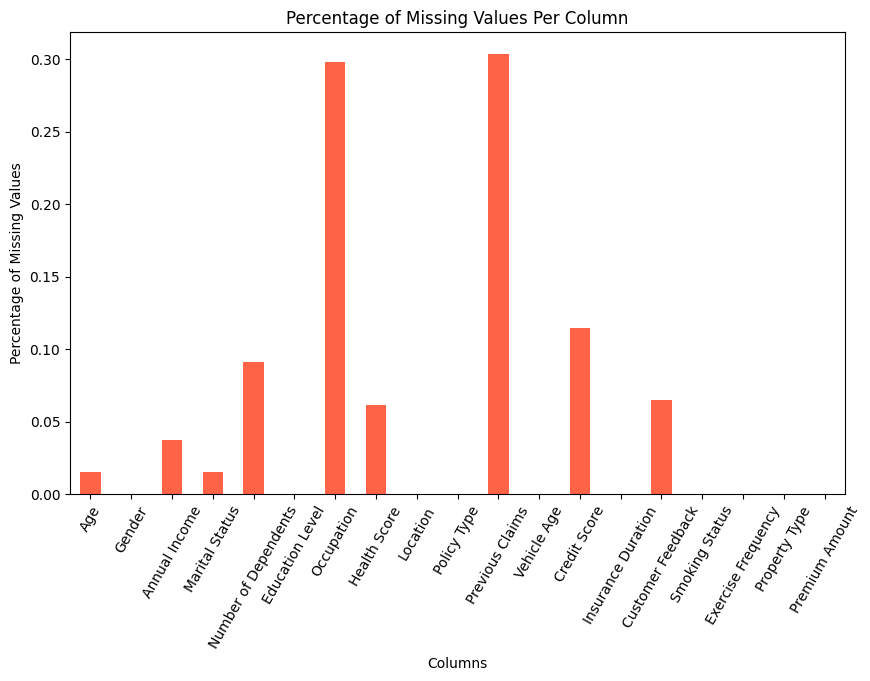

In [42]:

missing_values = df.isnull().mean()
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='tomato')
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=60)
plt.show()

In [13]:
df = df.dropna(subset=['Vehicle Age', 'Insurance Duration'])

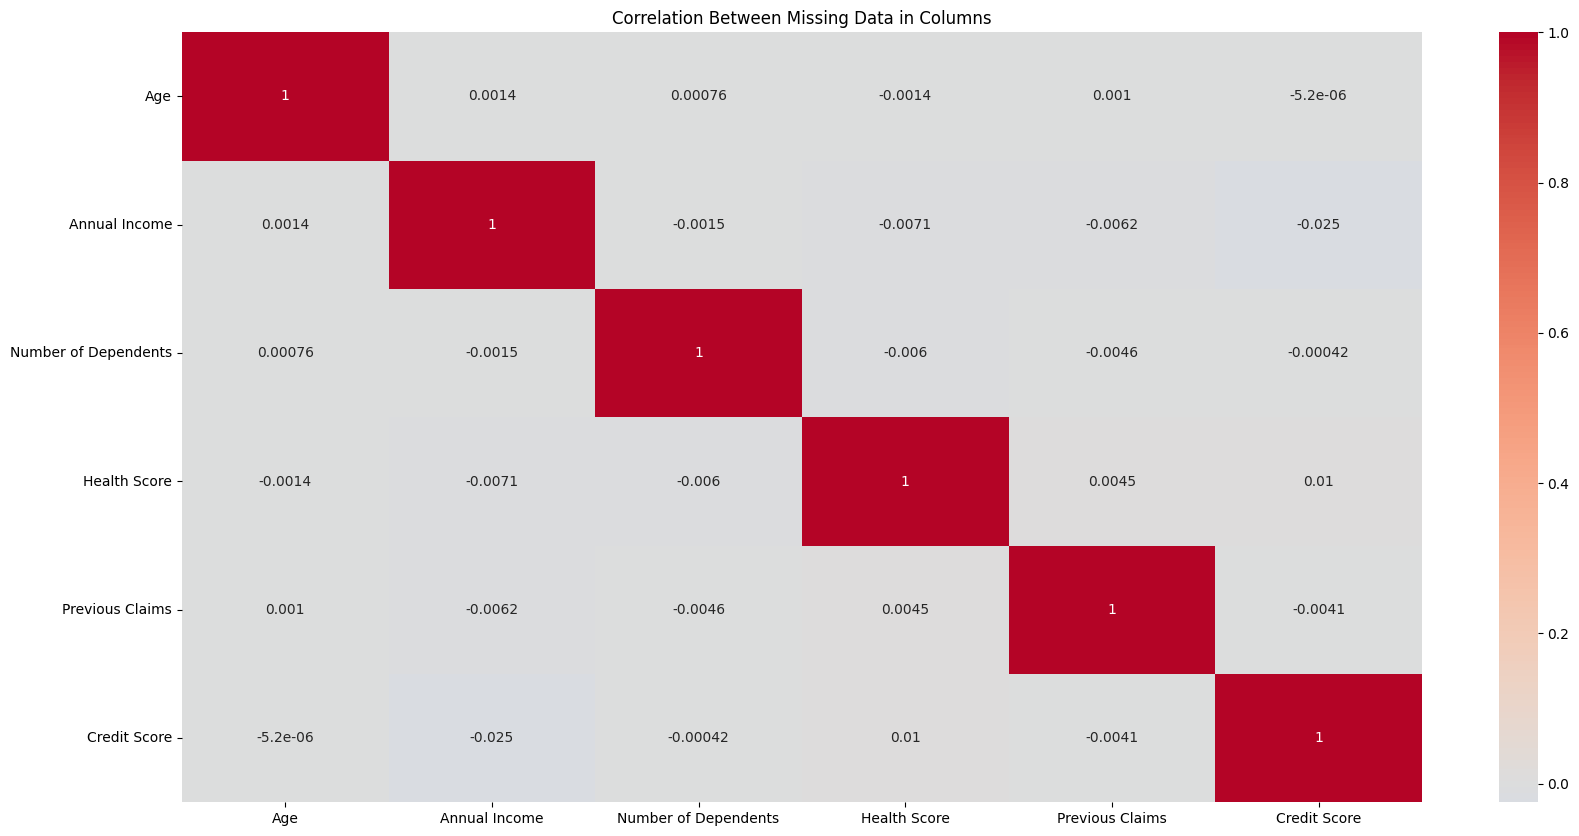

In [15]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(['Premium Amount', 'Vehicle Age', 'Insurance Duration'], axis=1)

missing_data = numerical_columns.isnull()

missing_corr = missing_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Missing Data in Columns')
plt.show()

- All correlations are very weak: The highest correlation value is 0.010136 between Health Score and Credit Score, and the lowest is -0.024685 between Annual Income and Credit Score. These values are extremely small, indicating that the missingness in these columns is mostly independent of one another.

- No strong patterns: The correlation values indicate that there are no clear patterns or dependencies in missing data between the numerical columns. This is a good indication that the missingness is likely to be Missing Completely at Random (MCAR) or, at worst, Missing Not at Random (MNAR) with a very weak correlation.

- Minimal missingness correlation: Given the weak correlations, it's reasonable to conclude that missing values are independent and don't exhibit strong structural relationships across the dataset.

In [25]:
import numpy as np

# Check the precision of each float64 column
numeric_columns = df.select_dtypes(include=['float64']).columns

print("Max precision in each float64 column:")
for col in numeric_columns:
    # Function to get the max number of decimal places
    def get_precision(val):
        # Convert to string and count decimal places if any
        if isinstance(val, float):
            if not np.isnan(val):
                return len(str(val).split('.')[1]) if '.' in str(val) else 0
        return 0

    max_precision = max(df[col].apply(get_precision))
    print(f"{col}: Max Precision = {max_precision} digits")


Max precision in each float64 column:
Health Score: Max Precision = 16 digits


In [22]:
# Convert all float64 columns to float32 except for 'Health Score'
cols_to_convert = ['Age', 'Annual Income', 'Number of Dependents', 
                   'Previous Claims', 'Vehicle Age', 'Credit Score', 
                   'Insurance Duration', 'Premium Amount']

# Convert columns to float32
df[cols_to_convert] = df[cols_to_convert].astype('float32')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199993 entries, 0 to 1199999
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181288 non-null  float32
 1   Gender                1199993 non-null  object 
 2   Annual Income         1155045 non-null  float32
 3   Marital Status        1181464 non-null  object 
 4   Number of Dependents  1090321 non-null  float32
 5   Education Level       1199993 non-null  object 
 6   Occupation            841919 non-null   object 
 7   Health Score          1125917 non-null  float64
 8   Location              1199993 non-null  object 
 9   Policy Type           1199993 non-null  object 
 10  Previous Claims       835965 non-null   float32
 11  Vehicle Age           1199993 non-null  float32
 12  Credit Score          1062111 non-null  float32
 13  Insurance Duration    1199993 non-null  float32
 14  Customer Feedback     1122169 non-null 

In [ ]:
# Now I have removed unnecessary cols from data and now I have updated raw data 
# train test splitting can be done by ingestion file
# after this all i have to do is preprocessing and then model building
# for preprocessing first i have to decide how to do imputation 
# then i have to do encoding and scaling

In [27]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181288e+06,1.155045e+06,1.090321e+06,1.125917e+06,835965.000000,1.199993e+06,1.062111e+06,1.199993e+06,1.199993e+06
mean,4.114553e+01,3.274530e+04,2.009931e+00,2.561394e+01,1.002687,9.569881e+00,5.929249e+02,5.018225e+00,1.102544e+03
std,1.353994e+01,3.217955e+04,1.417339e+00,1.220344e+01,0.982839,5.776186e+00,1.499819e+02,2.594333e+00,8.649996e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591897e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457872e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


- High Variability in Income: Annual income has a large spread, and may benefit from better handling of outliers.
- Wide Range of Vehicle and Insurance Durations: There is considerable variation in both vehicle age and insurance duration.
- Possible Outliers: Both the Annual Income and Premium Amount columns show large ranges and may need to be examined for outliers that could skew analysis.
- Low Claim Frequency: Most customers have a low number of previous claims.
- Moderate Credit Scores: Credit scores are moderately spread but don't reach the highest end of the scale on average.

In [29]:
# Select the categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique values and the count for each categorical column
for col in categorical_cols:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)
    print(f"Column: '{col}'")
    print(f"Total unique values: {num_unique_values}")
    print(f"Unique values: {unique_values}\n")


Column: 'Gender'
Total unique values: 2
Unique values: ['Female' 'Male']

Column: 'Marital Status'
Total unique values: 4
Unique values: ['Married' 'Divorced' 'Single' nan]

Column: 'Education Level'
Total unique values: 4
Unique values: ["Bachelor's" "Master's" 'High School' 'PhD']

Column: 'Occupation'
Total unique values: 4
Unique values: ['Self-Employed' nan 'Employed' 'Unemployed']

Column: 'Location'
Total unique values: 3
Unique values: ['Urban' 'Rural' 'Suburban']

Column: 'Policy Type'
Total unique values: 3
Unique values: ['Premium' 'Comprehensive' 'Basic']

Column: 'Customer Feedback'
Total unique values: 4
Unique values: ['Poor' 'Average' 'Good' nan]

Column: 'Smoking Status'
Total unique values: 2
Unique values: ['No' 'Yes']

Column: 'Exercise Frequency'
Total unique values: 4
Unique values: ['Weekly' 'Monthly' 'Daily' 'Rarely']

Column: 'Property Type'
Total unique values: 3
Unique values: ['House' 'Apartment' 'Condo']



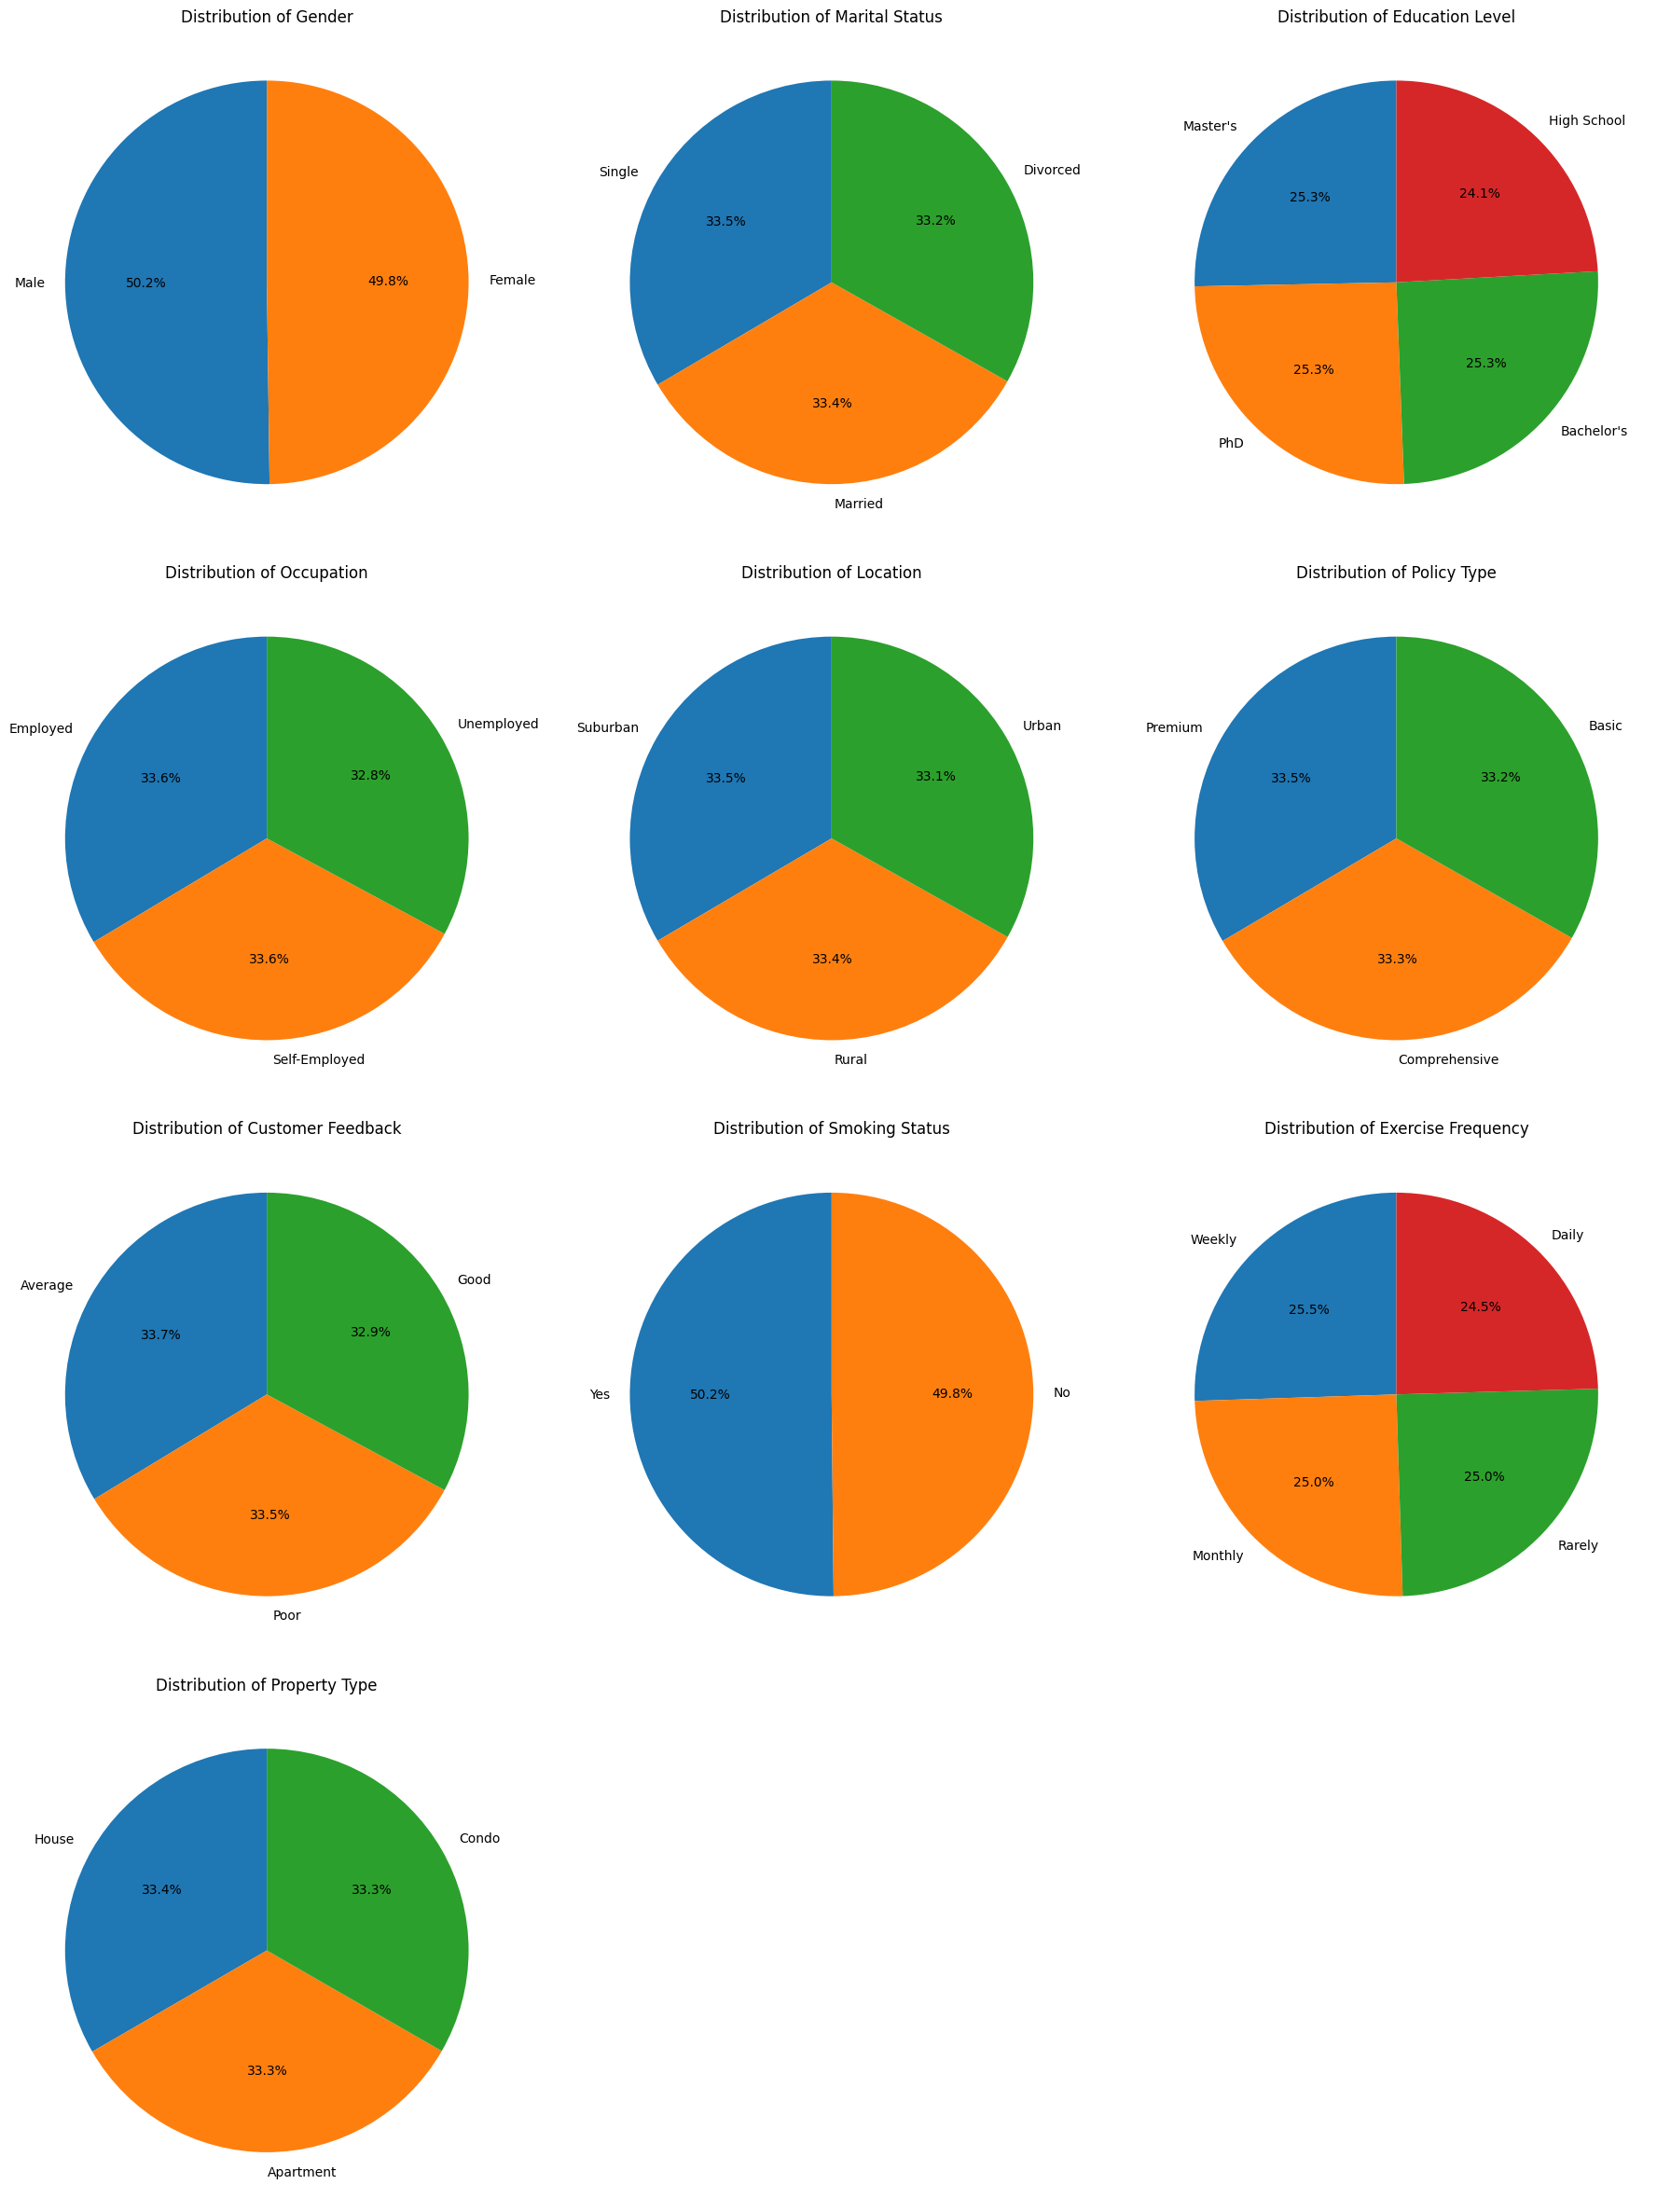

In [38]:
import matplotlib.pyplot as plt

# Number of categorical columns
num_cols = len(categorical_cols)

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=3, figsize=(18, 6 * ((num_cols + 2) // 3)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create pie charts for all the categorical columns
for i, col in enumerate(categorical_cols):
    data = df[col].value_counts()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- categorical data is well distributed

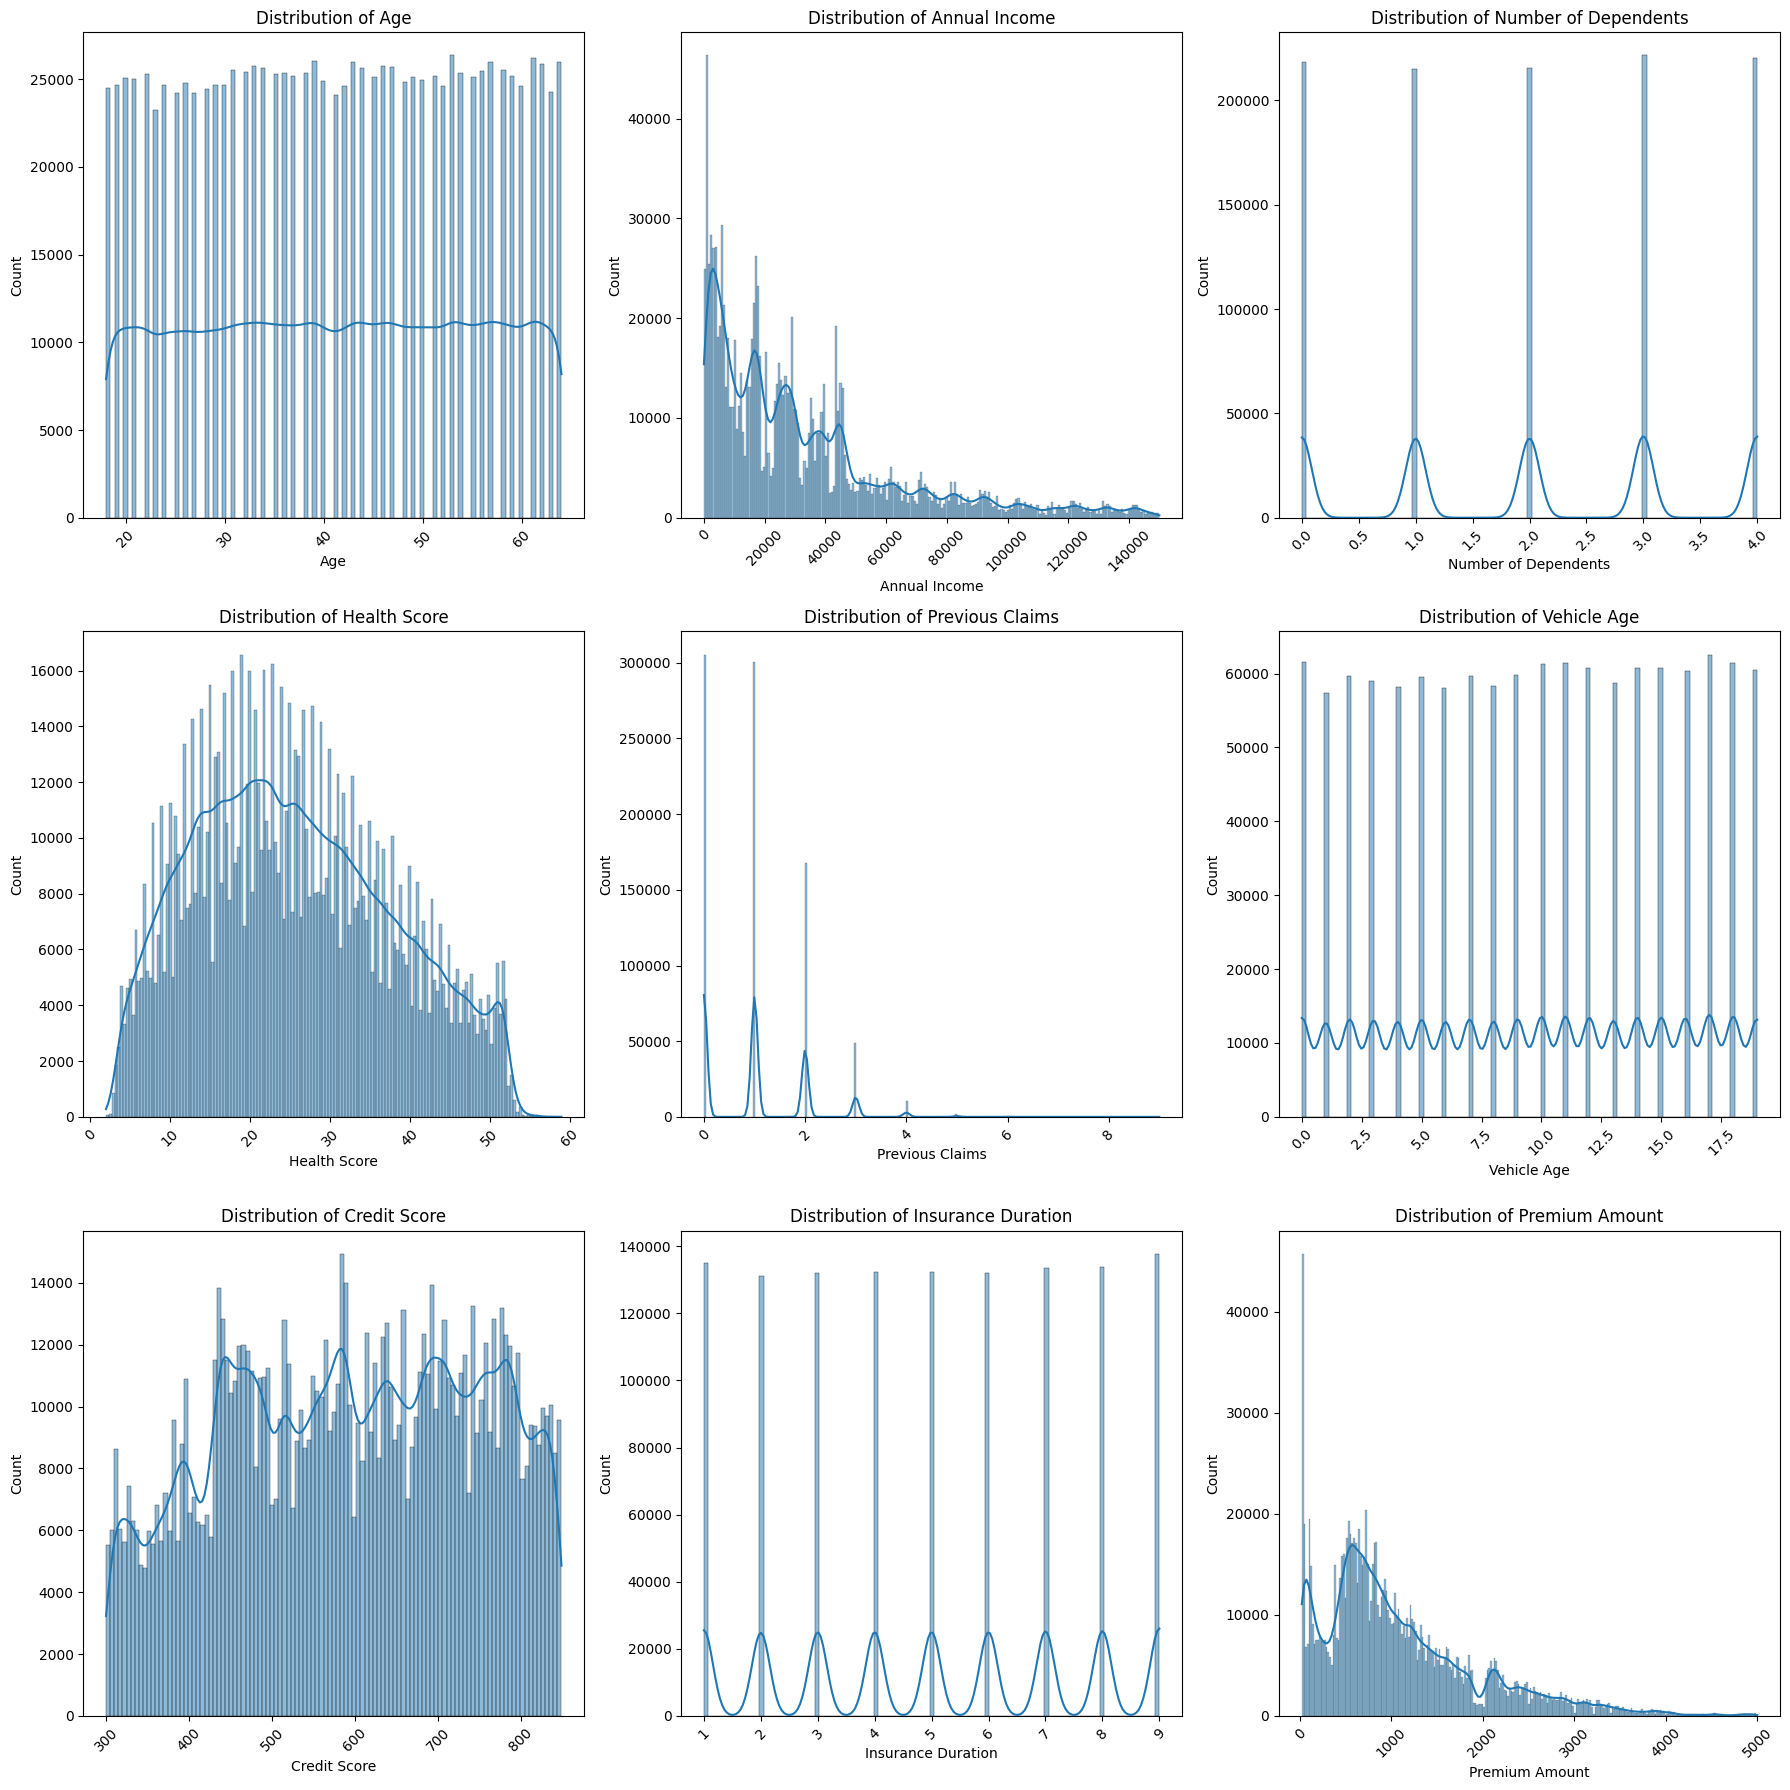

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Number of numerical columns
num_numerical_cols = len(numerical_cols)

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=(num_numerical_cols + 2) // 3, ncols=3, figsize=(18, 6 * ((num_numerical_cols + 2) // 3)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create distribution plots for all the numerical columns
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- don't remove outliers from the previous claims, as it will be important factor for premium

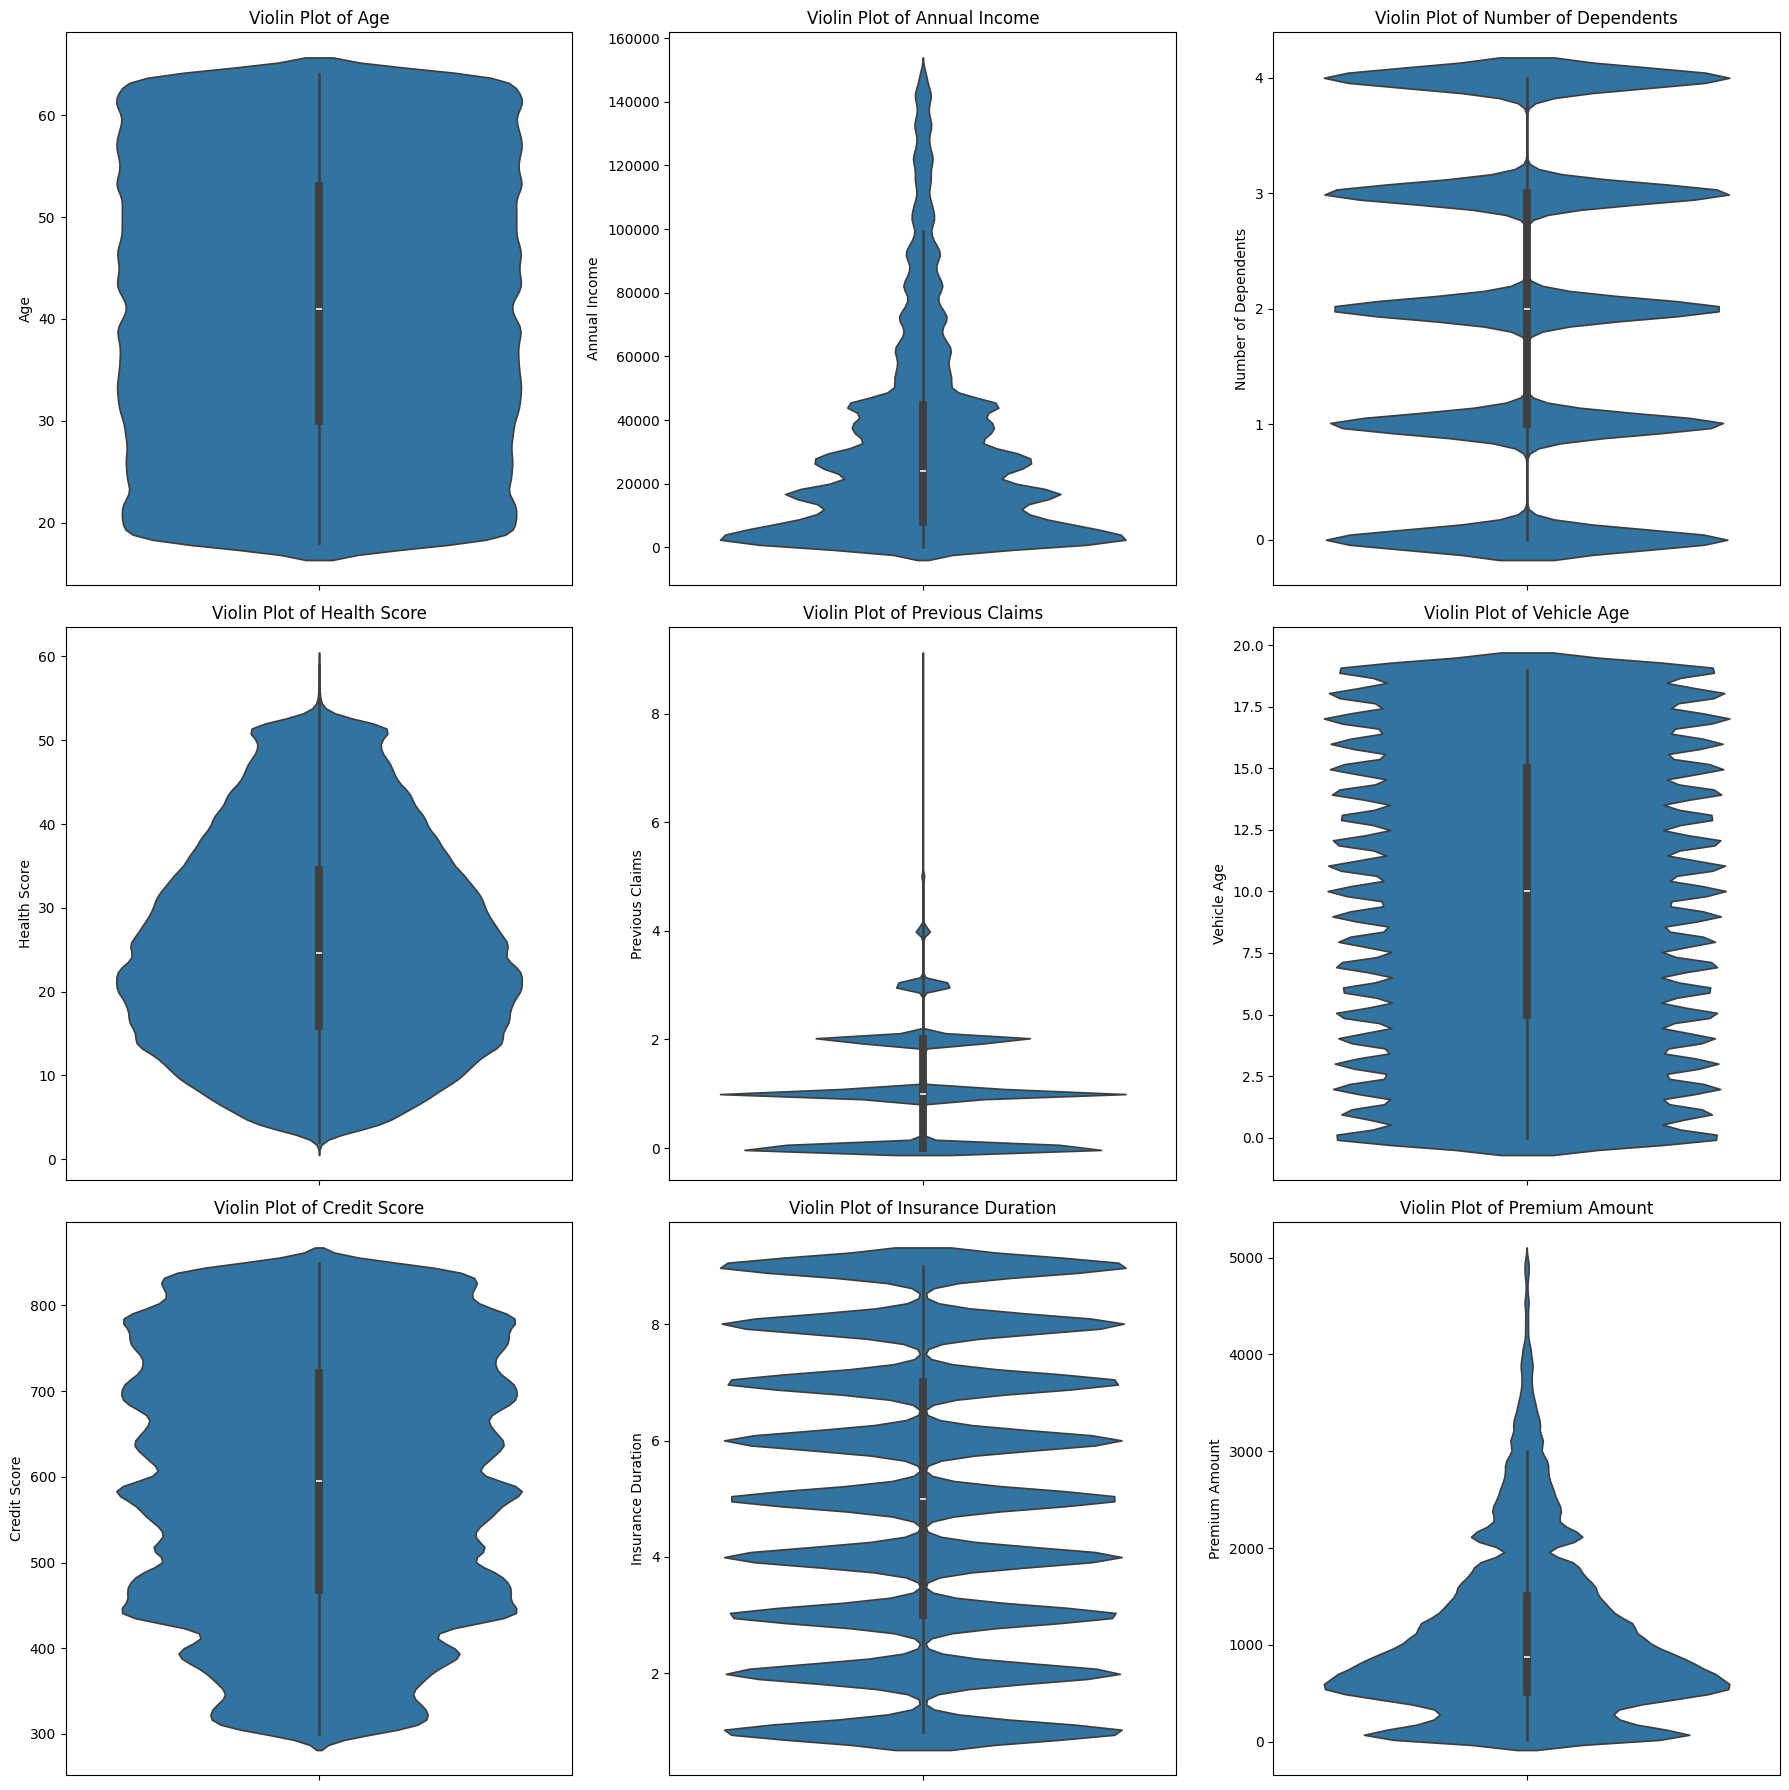

In [39]:
# Number of numerical columns
num_numerical_cols = len(numerical_cols)

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=(num_numerical_cols + 2) // 3, ncols=3, figsize=(18, 6 * ((num_numerical_cols + 2) // 3)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create violin plots for all the numerical columns
for i, col in enumerate(numerical_cols):
    sns.violinplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Many variables (e.g., Annual Income, Premium Amount) are positively skewed, meaning most values are concentrated at lower ranges while few extreme values stretch the distribution.
- Discrete variables like Number of Dependents and Insurance Duration show clear step-like patterns, with prominent peaks indicating frequently occurring values.
- Continuous variables like Age and Health Score are more symmetrically distributed, representing balanced populations.

In [40]:
# Define the file path
file_path = '/Users/shivanshgupta/Desktop/self_projcs/Insurance-Project/artifacts/raw_explored_data.csv'

# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)

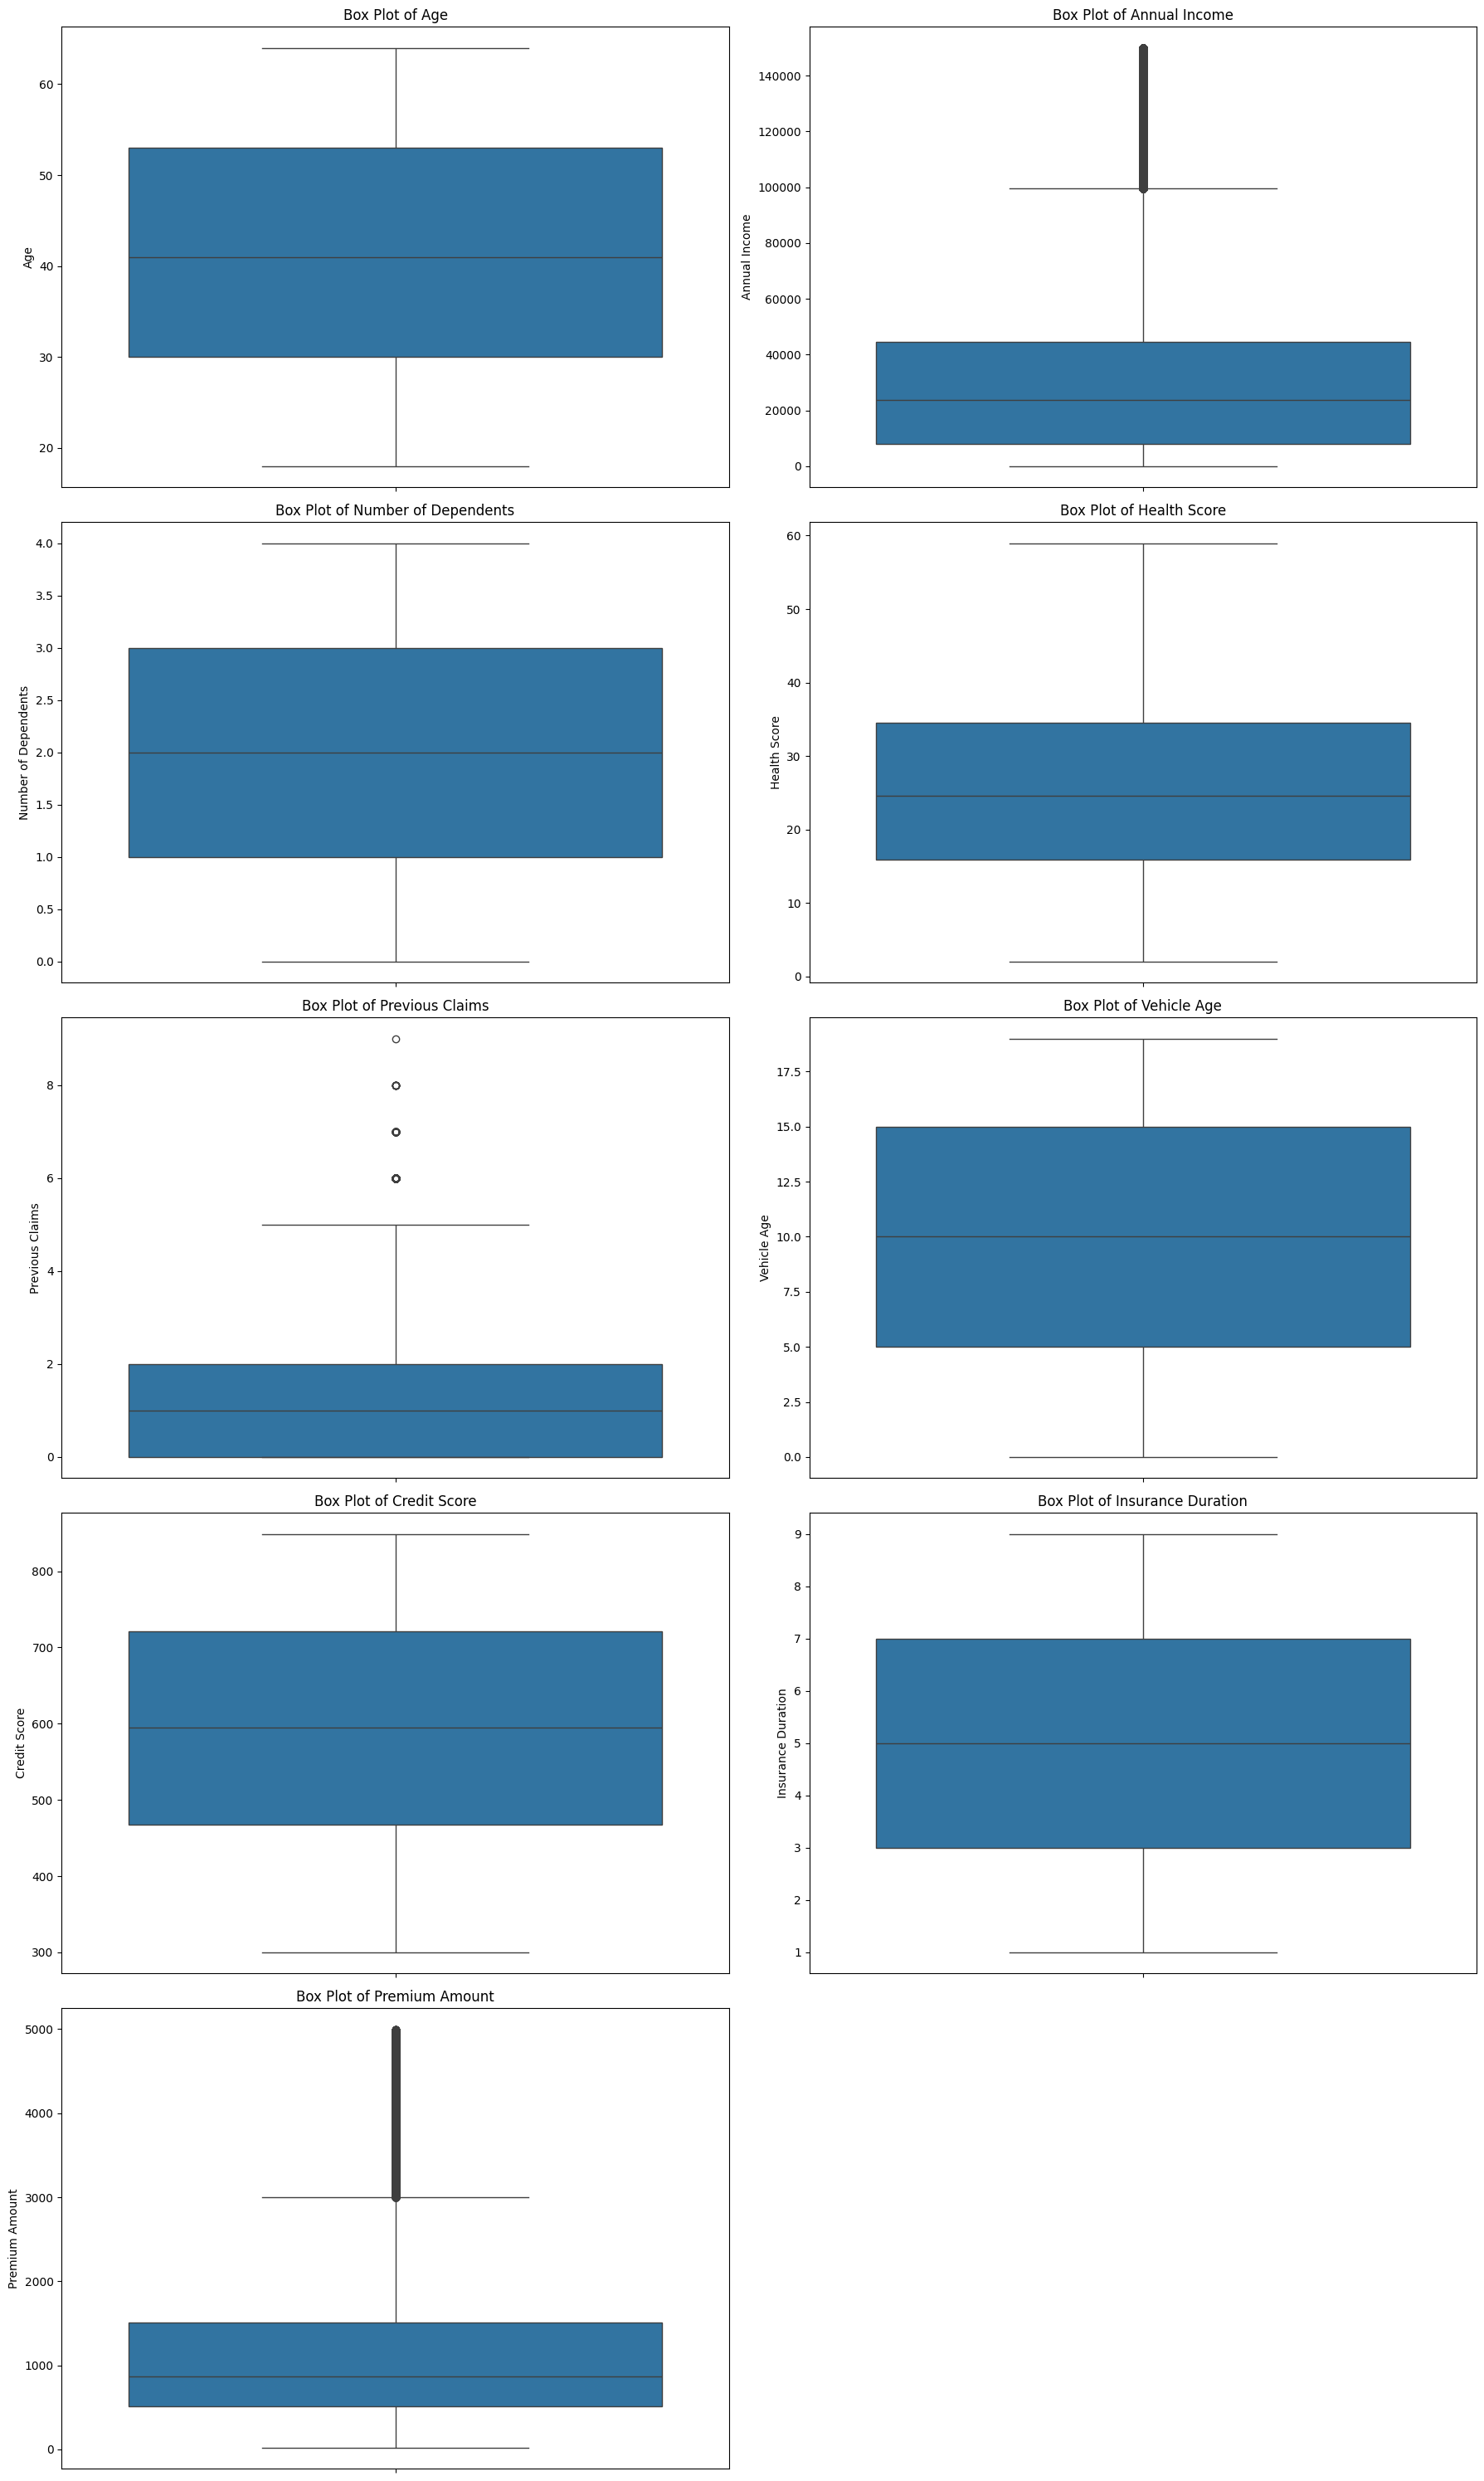

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Number of numerical columns
num_numerical_cols = len(numerical_cols)

# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=(num_numerical_cols + 1) // 2, ncols=2, figsize=(18, 6 * ((num_numerical_cols + 1) // 2)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for all the numerical columns
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

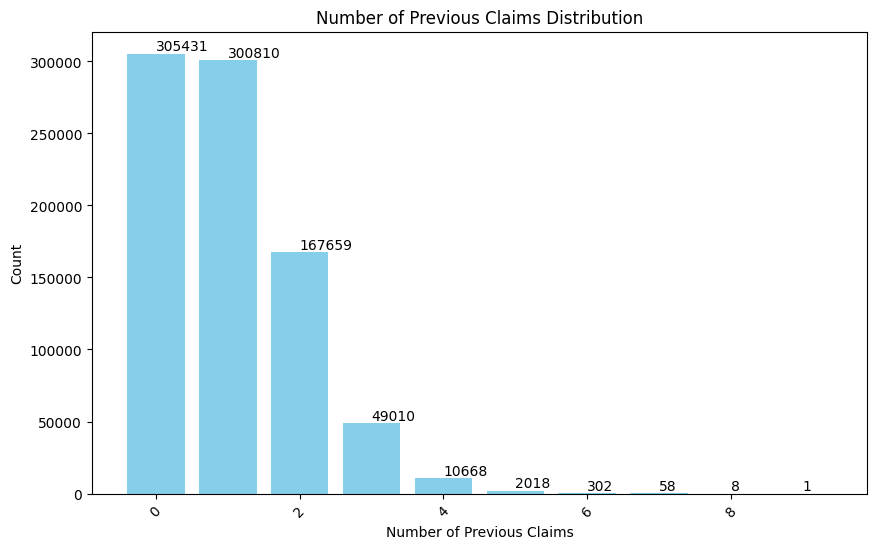

In [45]:
import matplotlib.pyplot as plt

# Count the number of previous claims
prev_claims_counts = df['Previous Claims'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(prev_claims_counts.index, prev_claims_counts.values, color='skyblue')

# Add text annotations on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.xlabel('Number of Previous Claims')
plt.ylabel('Count')
plt.title('Number of Previous Claims Distribution')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Filter rows where 'Previous Claims' is 8 or 9
filtered_df = df[df['Previous Claims'].isin([8, 9])]

# Print the filtered rows in a readable manner
print(filtered_df.to_string(index=False))

 Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration Customer Feedback Smoking Status Exercise Frequency Property Type  Premium Amount
36.0 Female        16274.0       Divorced                   NaN        Master's    Unemployed     10.944883 Suburban       Premium              8.0         14.0         595.0                 9.0           Average             No              Daily         House          1001.0
50.0 Female        16962.0        Married                   4.0             PhD    Unemployed     30.153379    Urban         Basic              8.0          6.0         775.0                 3.0           Average             No              Daily         Condo          1354.0
32.0   Male        36255.0         Single                   2.0        Master's    Unemployed     33.369863    Urban       Premium              8.0         18.0         

In [47]:
# Calculate the correlation between 'Previous Claims' and 'Premium Amount'
correlation = df['Previous Claims'].corr(df['Premium Amount'])
print(f"Correlation between Previous Claims and Premium Amount: {correlation}")

Correlation between Previous Claims and Premium Amount: 0.04687278460924452


In [49]:
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Drop rows with missing values in 'Previous Claims' or 'Premium Amount'
df_clean = df.dropna(subset=['Previous Claims', 'Premium Amount'])

# Prepare the data
X = df_clean[['Previous Claims']]
y = df_clean['Premium Amount']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (importance) of 'Previous Claims'
importance = model.coef_[0]
print(f"Importance of Previous Claims with respect to Premium Amount: {importance}")

# Optionally, check the model's performance
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared value: {r2}")

Importance of Previous Claims with respect to Premium Amount: 41.506961822509766
R-squared value: 0.002197265625


In [60]:
# Filter rows where 'Annual Income' is greater than 140000
high_income_df = df[df['Annual Income'] < 140000]

# Number of data points with 'Annual Income' above 140000
num_high_income = high_income_df.shape[0]

# Total number of data points
total_data_points = df.shape[0]

# Percentage of data points with 'Annual Income' above 140000
percent_high_income = (num_high_income / total_data_points) * 100

print(f"Number of data points with Annual Income above 140000: {num_high_income}")
print(f"Percentage of data points with Annual Income above 140000: {percent_high_income:.2f}%")

Number of data points with Annual Income above 140000: 1144344
Percentage of data points with Annual Income above 140000: 95.36%


/var/folders/2k/4mj9llg97bv9tpsg50qgdrtc0000gp/T/ipykernel_12703/3605994218.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




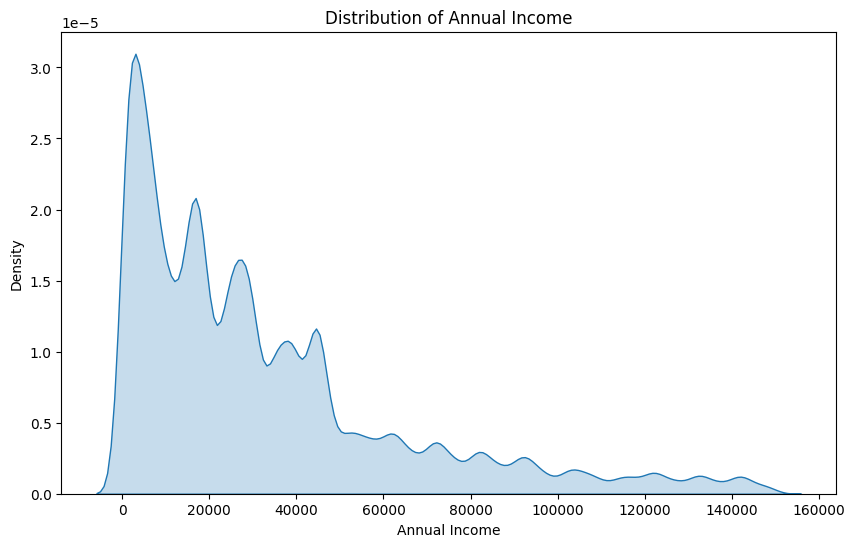

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the KDE (Kernel Density Estimate) for 'Annual Income'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Annual Income', shade=True)

plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

In [55]:
# Filter rows where 'Annual Income' is negative
negative_income_df = df[df['Annual Income'] < 0]

# Number of data points with negative 'Annual Income'
num_negative_income = negative_income_df.shape[0]

# Total number of data points
total_data_points = df.shape[0]

# Percentage of data points with negative 'Annual Income'
percent_negative_income = (num_negative_income / total_data_points) * 100

print(f"Number of data points with negative Annual Income: {num_negative_income}")
print(f"Percentage of data points with negative Annual Income: {percent_negative_income:.2f}%")

Number of data points with negative Annual Income: 0
Percentage of data points with negative Annual Income: 0.00%


In [61]:
df = df[df['Annual Income'] >= 100]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150962 entries, 0 to 1199997
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1133057 non-null  float32
 1   Gender                1150962 non-null  object 
 2   Annual Income         1150962 non-null  float32
 3   Marital Status        1133441 non-null  object 
 4   Number of Dependents  1045696 non-null  float32
 5   Education Level       1150962 non-null  object 
 6   Occupation            807138 non-null   object 
 7   Health Score          1079436 non-null  float64
 8   Location              1150962 non-null  object 
 9   Policy Type           1150962 non-null  object 
 10  Previous Claims       801146 non-null   float32
 11  Vehicle Age           1150962 non-null  float32
 12  Credit Score          1016958 non-null  float32
 13  Insurance Duration    1150962 non-null  float32
 14  Customer Feedback     1077308 non-null 

In [63]:
# Define the file path
file_path = '/Users/shivanshgupta/Desktop/self_projcs/Insurance-Project/artifacts/raw_explored_data.csv'

# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)